In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import functions as fnc
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [ ]:
from tifffile import imread

image = imread('/DATA/vito/data/Argentina/Orthomosaic_hq_0.5mm_clipped.tif')


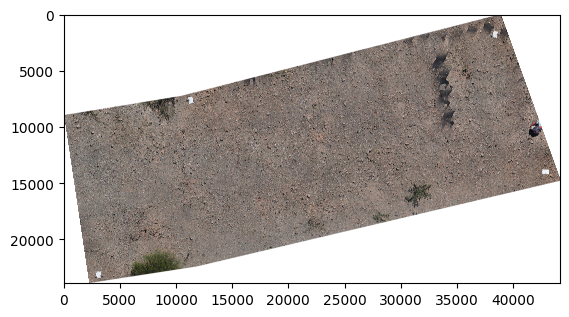

In [5]:
image=image[:,:,:3]
mask = (image == [0, 0, 0]).all(axis=-1)
image[mask] = [255, 255, 255]
plt.imshow(image[:,:,:3])

(20171, 22055, 3)
(28382, 32563, 3)
(17592, 21739, 3)


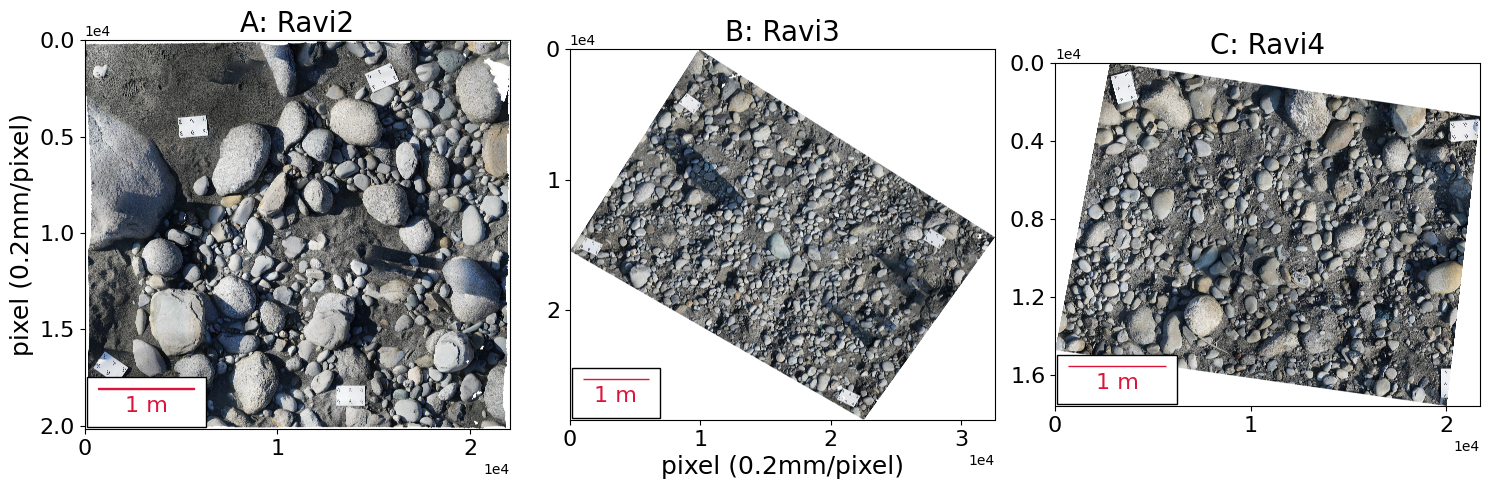

In [3]:
resolution = 0.2  
scalebar_length_mm = 1000  
scalebar_length_px = scalebar_length_mm / resolution

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi2_orthomosaic_02mm.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = (image == [0, 0, 0]).all(axis=-1)
image[mask] = [255, 255, 255]
plt.imshow(image)
plt.title('A: Ravi2', fontsize=20)
#ticks=plt.get_xticks()
plt.ylabel('pixel (0.2mm/pixel)', fontsize=18)
plt.xlabel('')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0, 0))
x_ticks = plt.xticks()[0] 
y_ticks = plt.yticks()[0]

plt.xticks(x_ticks[1:-1:2],fontsize=16)
plt.yticks(y_ticks[1:-1:2],fontsize=16)
ax=plt.gca()
scalebar = AnchoredSizeBar(ax.transData, scalebar_length_px, '1 m', 
                           loc='lower left', pad=0.5, sep=5, 
                           color='crimson', frameon=True, size_vertical=5,
                           fontproperties=fm.FontProperties(size=16))
print(image.shape)
ax.add_artist(scalebar)

plt.subplot(1,3,2)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi3_orthomosaic_clip_02mm.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=image[:,:,:3]
mask = (image == [0, 0, 0]).all(axis=-1)
image[mask] = [255, 255, 255]
plt.imshow(image)
plt.title('B: Ravi3', fontsize=20)
plt.xlabel('pixel (0.2mm/pixel)', fontsize=18)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0, 0))
x_ticks = plt.xticks()[0] 
y_ticks = plt.yticks()[0]

plt.xticks(x_ticks[1:-1:2],fontsize=16)
plt.yticks(y_ticks[1:-1:2],fontsize=16)
ax=plt.gca()
scalebar = AnchoredSizeBar(ax.transData, scalebar_length_px, '1 m', 
                           loc='lower left', pad=0.5, sep=5, 
                           color='crimson', frameon=True, size_vertical=5,
                           fontproperties=fm.FontProperties(size=16))
print(image.shape)
ax.add_artist(scalebar)

plt.subplot(1,3,3)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi4_orthomosaic_clip_02mm.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=image[:,:,:3]
mask = (image == [0, 0, 0]).all(axis=-1)
image[mask] = [255, 255, 255]
plt.imshow(image)
plt.title('C: Ravi4', fontsize=20)
plt.xlabel('')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0, 0))
x_ticks = plt.xticks()[0] 
y_ticks = plt.yticks()[0]

plt.xticks(x_ticks[1:-1:2],fontsize=16)
plt.yticks(y_ticks[1:-1:2],fontsize=16)
ax=plt.gca()
scalebar = AnchoredSizeBar(ax.transData, scalebar_length_px, '1 m', 
                           loc='lower left', pad=0.5, sep=5, 
                           color='crimson', frameon=True, size_vertical=5,
                           fontproperties=fm.FontProperties(size=16))
print(image.shape)
ax.add_artist(scalebar)
plt.tight_layout()
plt.savefig('/DATA/vito/fig/ravi_figure.png')

In [5]:
image = cv2.imread('/DATA/vito/data/Ravi/Ravi3_orthomosaic_clip_02mm.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=image[:,:,:3]
mask = np.load('/DATA/vito/output/Ravi3_run2_dw4_cp512_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

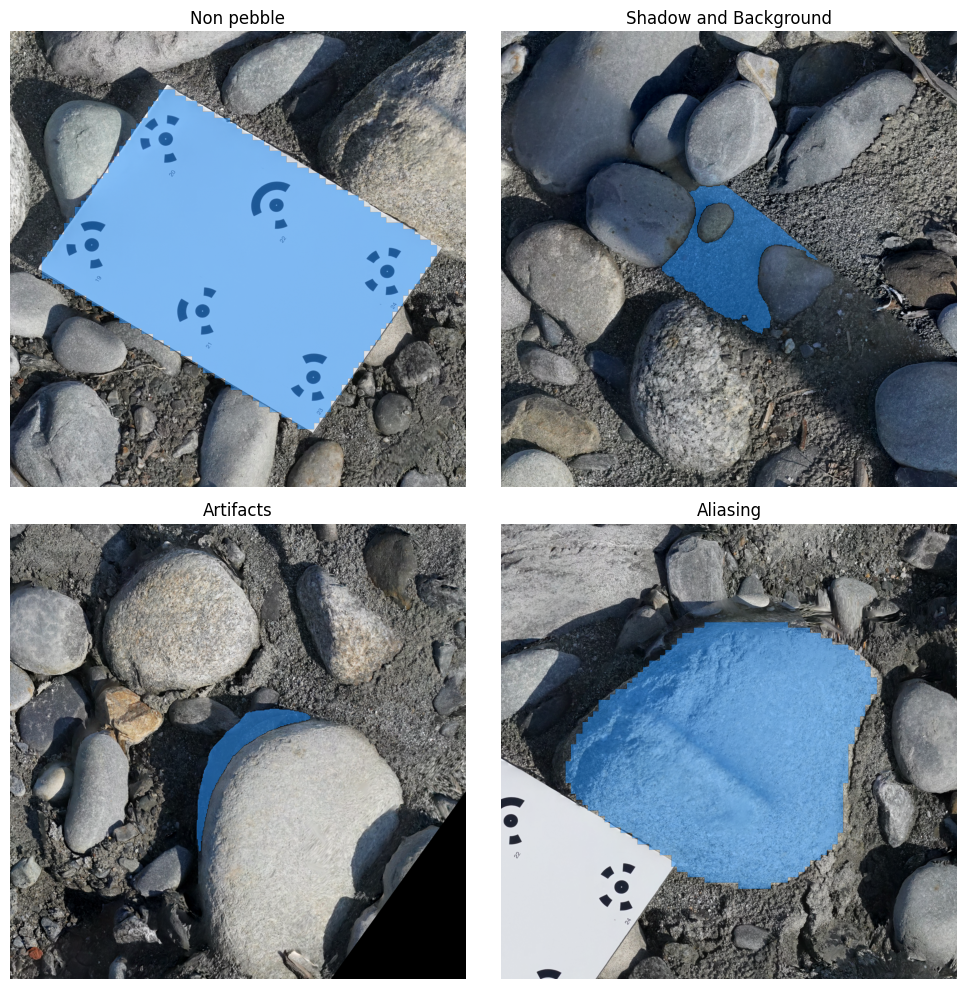

In [ ]:
object_ids = [2591, 1703, 205, 2873]
title=['A: Non pebble','B: Shadow and Background', 'C: Artifacts','D: Aliasing']
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes=axes.flatten()
for i, obj_id in enumerate(object_ids):

    object_mask = (mask == obj_id)

    half_size = 1024
    y,x=np.mean(np.where((mask == obj_id)),axis=1)
    center_x, center_y=int(x),int(y)
    x1, y1 = max(center_x - half_size, 0), max(center_y - half_size, 0)
    x2, y2 = min(center_x + half_size, image.shape[1]), min(center_y + half_size, image.shape[0])

    cropped_img = image[y1:y2, x1:x2].copy()
    cropped_mask = object_mask[y1:y2, x1:x2]

    axes[i].imshow(cropped_img)
    axes[i].set_title(title[i], fontsize=20)
    axes[i].axis("off")
    #axes[i].imshow(cropped_mask,alpha=0.5)
    fnc.show_mask(cropped_mask,axes[i])

plt.tight_layout()
plt.savefig('fig/limitation.png')
plt.show()


([<matplotlib.axis.YTick at 0x78333dbe97c0>,
 [Text(0, 0.0, '0.0'),
  Text(0, 4000.0, '0.4'),
  Text(0, 8000.0, '0.8'),
  Text(0, 12000.0, '1.2'),
  Text(0, 16000.0, '1.6')])

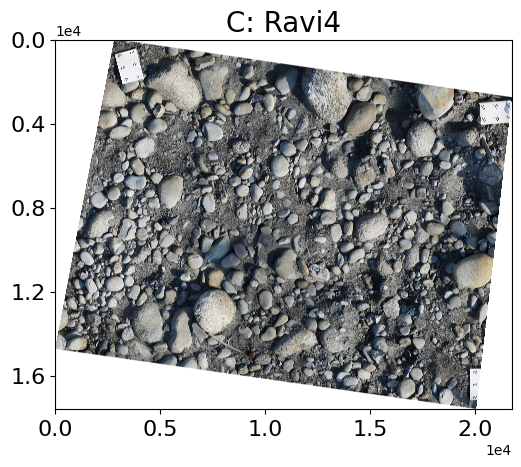

In [2]:

image = cv2.imread('/DATA/vito/data/Ravi/Ravi4_orthomosaic_clip_02mm.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=image[:,:,:3]
mask = (image == [0, 0, 0]).all(axis=-1)
image[mask] = [255, 255, 255]
plt.imshow(image)
plt.title('C: Ravi4', fontsize=20)
plt.xlabel('')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0, 0))
x_ticks = plt.xticks()[0] 
y_ticks = plt.yticks()[0]

plt.xticks(x_ticks[1:-1:2],fontsize=16)
plt.yticks(y_ticks[1:-1:2],fontsize=16)

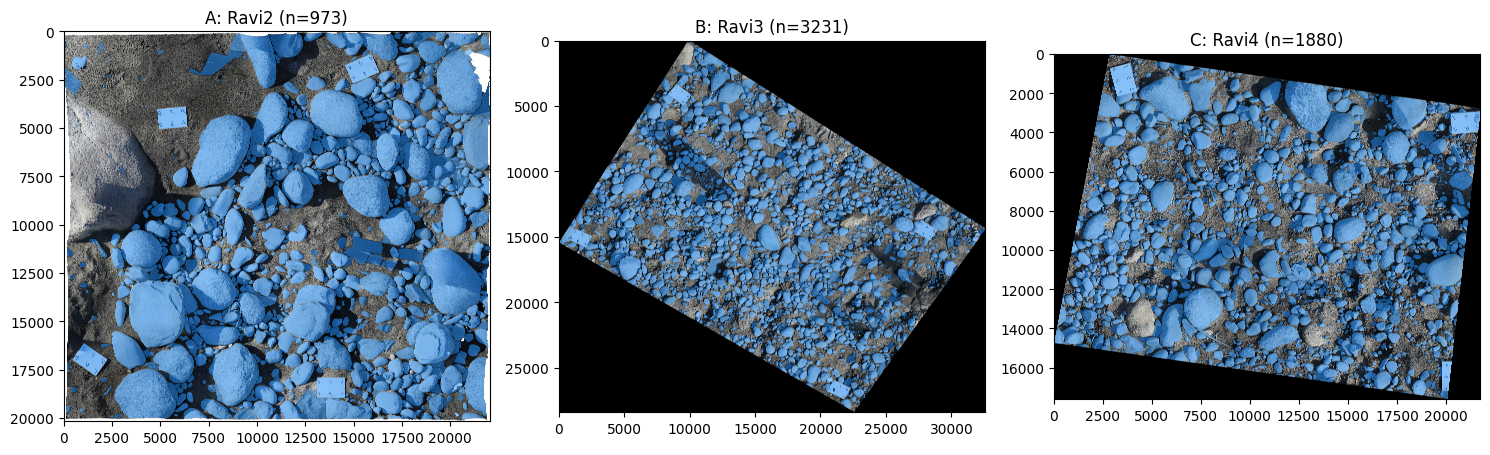

In [2]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi2_orthomosaic_02mm.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = np.load('/DATA/vito/output/Ravi2_run2_dw4_10_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

plt.imshow(image)
fnc.show_mask(mask>0,plt.gca(),np.array([30/255, 144/255, 255/255]))
plt.title(f'A: Ravi2 (n={len(np.unique(mask))-1})')

plt.subplot(1,3,2)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi3_orthomosaic_clip_02mm.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = np.load('/DATA/vito/output/Ravi3_run2_dw4_cp512_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

plt.imshow(image)
fnc.show_mask(mask>0,plt.gca(),np.array([30/255, 144/255, 255/255]))
plt.title(f'B: Ravi3 (n={len(np.unique(mask))-1})')

plt.subplot(1,3,3)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi4_orthomosaic_clip_02mm.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = np.load('/DATA/vito/output/Ravi4_run2_dw4_cp512_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

plt.imshow(image)
fnc.show_mask(mask>0,plt.gca(),np.array([30/255, 144/255, 255/255]))
plt.title(f'C: Ravi4 (n={len(np.unique(mask))-1})')

plt.tight_layout()

In [5]:
import scipy.ndimage as ndi
from scipy.spatial import cKDTree as kdtree


def graph_coloring(label, k=500):
    new_label = np.zeros(label.shape)
    new_label[np.isnan(label)] = np.nan
    contour_label = label.copy()
    contour_label[ndi.binary_erosion(~np.isnan(label))] = np.nan
    y, x = np.nonzero(~np.isnan(contour_label))
    la = label[y, x]
    pt = np.c_[x, y]
    tr = kdtree(pt)
    # construct neighborhood graph
    graph = {}
    for li in range(1, int(la.max()) + 1):
        _, ii = tr.query(pt[la == li], k=k, workers=-1)
        laii = la[ii]
        sl = np.argmax(laii != li, axis=1)
        laii = laii[np.arange(sl.shape[0]), sl]
        graph[li] = np.unique(laii).tolist()

    # graph coloring
    color = {}
    for li in graph:
        color_neighbors = {color[i] for i in graph[li] if i in color}
        c = 0
        while c in color_neighbors:
            c += 1
        color[li] = c

    colors = np.array(list(color.values()))
    for i, li in enumerate(colors):
        new_label[label == i+1] = li

    return new_label

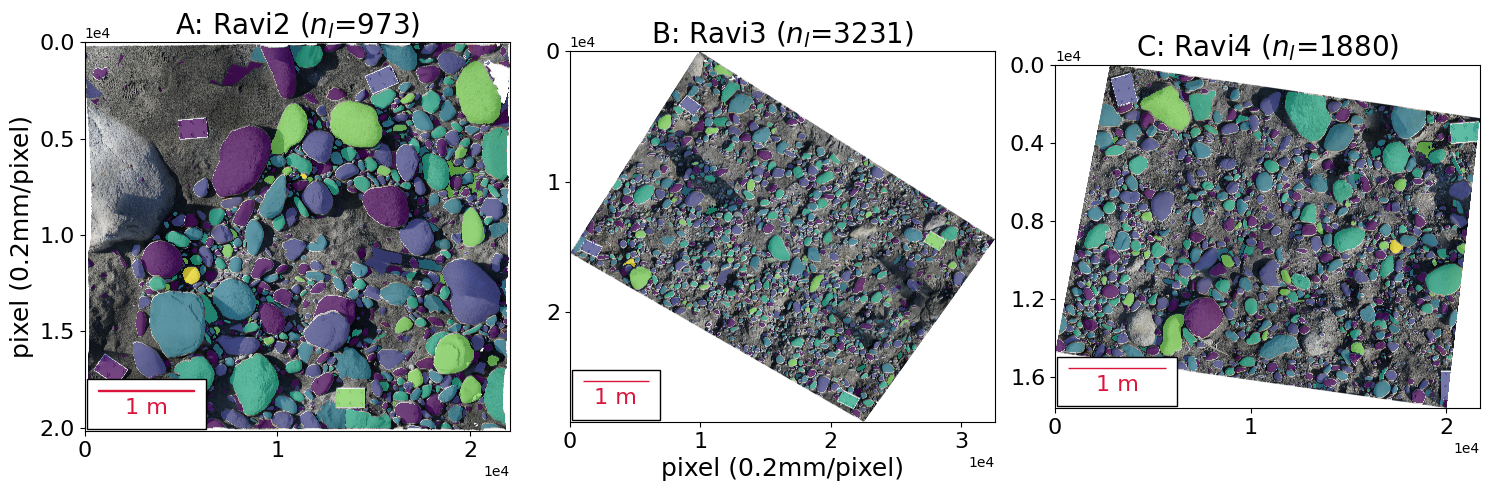

: 

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi2_orthomosaic_02mm.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=image[:,:,:3]
mask = (image == [0, 0, 0]).all(axis=-1)
image[mask] = [255, 255, 255]
mask = np.load('/DATA/vito/output/Ravi2_run2_dw4_10_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

count=len(np.unique(mask))-1
mask = mask.astype("float")
mask[mask == 0] = np.nan
mask = graph_coloring(mask)

plt.imshow(image)
plt.imshow(mask, alpha=0.7)
plt.title(fr'A: Ravi2 ($n_l$={count})', fontsize=20)
plt.ylabel('pixel (0.2mm/pixel)', fontsize=18)
plt.xlabel('')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0, 0))
x_ticks = plt.xticks()[0] 
y_ticks = plt.yticks()[0]

plt.xticks(x_ticks[1:-1:2],fontsize=16)
plt.yticks(y_ticks[1:-1:2],fontsize=16)
ax=plt.gca()
scalebar = AnchoredSizeBar(ax.transData, scalebar_length_px, '1 m', 
                           loc='lower left', pad=0.5, sep=5, 
                           color='crimson', frameon=True, size_vertical=5,
                           fontproperties=fm.FontProperties(size=16))
ax.add_artist(scalebar)

plt.subplot(1,3,2)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi3_orthomosaic_clip_02mm.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=image[:,:,:3]
mask = (image == [0, 0, 0]).all(axis=-1)
image[mask] = [255, 255, 255]
mask = np.load('/DATA/vito/output/Ravi3_run2_dw4_cp512_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

count=len(np.unique(mask))-1
mask = mask.astype("float")
mask[mask == 0] = np.nan
mask = graph_coloring(mask)

plt.imshow(image)
plt.imshow(mask, alpha=0.7)
plt.title(fr'B: Ravi3 ($n_l$={count})', fontsize=20)
plt.xlabel('pixel (0.2mm/pixel)',fontsize=18)
ax=plt.gca()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0, 0))
x_ticks = plt.xticks()[0] 
y_ticks = plt.yticks()[0]

plt.xticks(x_ticks[1:-1:2],fontsize=16)
plt.yticks(y_ticks[1:-1:2],fontsize=16)
scalebar = AnchoredSizeBar(ax.transData, scalebar_length_px, '1 m', 
                           loc='lower left', pad=0.5, sep=5, 
                           color='crimson', frameon=True, size_vertical=5,
                           fontproperties=fm.FontProperties(size=16))
ax.add_artist(scalebar)

plt.subplot(1,3,3)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi4_orthomosaic_clip_02mm.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=image[:,:,:3]
mask = (image == [0, 0, 0]).all(axis=-1)
image[mask] = [255, 255, 255]
mask = np.load('/DATA/vito/output/Ravi4_run2_dw4_cp512_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

count=len(np.unique(mask))-1
mask = mask.astype("float")
mask[mask == 0] = np.nan
mask = graph_coloring(mask)

plt.imshow(image)
plt.imshow(mask, alpha=0.7)
plt.title(fr'C: Ravi4 ($n_l$={count})', fontsize=20)
plt.xlabel('')
ax=plt.gca()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0, 0))
x_ticks = plt.xticks()[0] 
y_ticks = plt.yticks()[0]

plt.xticks(x_ticks[1:-1:2],fontsize=16)
plt.yticks(y_ticks[1:-1:2],fontsize=16)
ax=plt.gca()
scalebar = AnchoredSizeBar(ax.transData, scalebar_length_px, '1 m', 
                           loc='lower left', pad=0.5, sep=5, 
                           color='crimson', frameon=True, size_vertical=5,
                           fontproperties=fm.FontProperties(size=16))
ax.add_artist(scalebar)
plt.tight_layout()
plt.savefig('/DATA/vito/fig/ravi_result_figure.png')

ValueError: Cannot type empty list

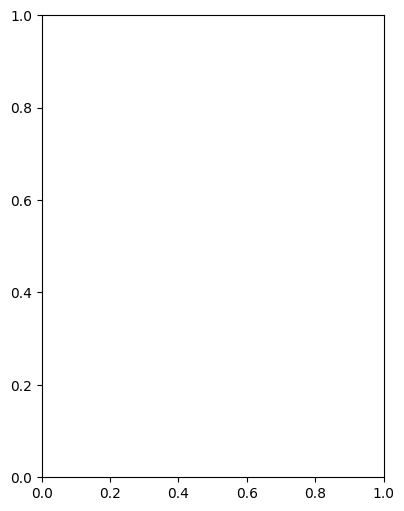

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi2_orthomosaic_02mm.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = np.load('/DATA/vito/output/Ravi2_run2_dw4_10_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

count=len(np.unique(mask))-1
mask = mask.astype("float")
mask[mask == 0] = np.nan
mask = graph_coloring(mask)

plt.imshow(image)
plt.imshow(mask, alpha=0.7)
plt.title(f'A: Ravi2 (n={count})')

plt.subplot(1,3,2)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi3_orthomosaic_clip_02mm.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = np.load('/DATA/vito/output/Ravi3_run2_dw4_cp512_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

count=len(np.unique(mask))-1
mask = mask.astype("float")
mask[mask == 0] = np.nan
mask = graph_coloring(mask)

plt.imshow(image)
plt.imshow(mask, alpha=0.7)
plt.title(f'B: Ravi3 (n={count})')

plt.subplot(1,3,3)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi4_orthomosaic_clip_02mm.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = np.load('/DATA/vito/output/Ravi4_run2_dw4_cp512_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

count=len(np.unique(mask))-1
mask = mask.astype("float")
mask[mask == 0] = np.nan
mask = graph_coloring(mask)

plt.imshow(image)
plt.imshow(mask, alpha=0.7)
plt.title(f'C: Ravi4 (n={count})')

plt.tight_layout()

In [ ]:
plt.figure(figsize=(15,6))
dw=10
plt.subplot(1,3,1)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi2_orthomosaic_02mm.png')[::dw,::dw]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = np.load('/DATA/vito/output/Ravi2_run2_dw4_10_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

plt.imshow(image)
for i in np.unique(mask)[1:]:
    fnc.show_mask(mask==i,plt.gca())
plt.title(f'A: Ravi2 (n={len(np.unique(mask))-1})')

plt.subplot(1,3,2)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi3_orthomosaic_clip_02mm.tif')[::dw,::dw]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = np.load('/DATA/vito/output/Ravi3_run2_dw4_cp512_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

plt.imshow(image)
for i in np.unique(mask)[1:]:
    fnc.show_mask(mask==i,plt.gca())
plt.title(f'B: Ravi3 (n={len(np.unique(mask))-1})')

plt.subplot(1,3,3)
image = cv2.imread('/DATA/vito/data/Ravi/Ravi4_orthomosaic_clip_02mm.tif')[::dw,::dw]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = np.load('/DATA/vito/output/Ravi4_run2_dw4_cp512_3b_minarea/Third/all_mask_third_pass_id.npy')
mask=cv2.resize(mask.astype(np.uint16), image.shape[:-1][::-1], interpolation = cv2.INTER_NEAREST)

plt.imshow(image)
for i in np.unique(mask)[1:]:
    fnc.show_mask(mask==i,plt.gca())
plt.title(f'C: Ravi4 (n={len(np.unique(mask))-1})')

plt.tight_layout()